# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# Business Understanding

## What do we know about used vehicles ?


According to numerus reports from The New York Times and other journals, worldwide economic challenges force countries to adopt the practice of buying used vehicles rather than new ones. Therefore, the rise of used vehicles is exponentially increasing [1]. With the growing influence of online selling, and the wide variety of available used vehicles, it can be difficult to determine a suitable price for a used vehicle. Moreover, several features are thought to be contributing to used vehicle price. These features include, but not limited to, year of make, milage, and overall condition. Consequently, features add to the complexity of placing a reasonable price tag for used vehicles that is profitable for the car dealership and convenient for the customer [2-5]. In this context, arises a need for a model that can determine features influencing used vehicle price.

Using historical dataset for selling prices of used vehicles, I will build a model that can efficiently predict a used vehicle price. From this model, I will be able to identify important features (with feature weights) that costumers value in a used vehicle.  These features weights could then be applied by the dealership to the current used vehicles which are about to be offered for sale. 

The primary objective is to create a model that can successfully predict used vehicle price.  Secondary objective is to identify important features associated with the selling price of a used vehicle. 


1. Neal E. Boudette. “Looking to Buy a Used Car in the Pandemic? So Is Everyone Else.” The New York Times, Oct. 7, 2021, https://www.nytimes.com/2020/09/07/business/used-cars-pandemic.html

2. How Much Is My Car Worth? A Methodology for Predicting Used Cars’ Prices Using Random Forest

3. Ellencweig, B., Ezratty, S., Fleming, D., & Miller, I. (2019, June 6). Used cars, new platforms:
Accelerating sales in a digitally disrupted market. McKinsey & Company.
https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/used-carsnew-platforms-accelerating-sales-in-a-digitally-disrupted-market

4. Engelmann, A., Bauer, I., Dolata, M. et al. Promoting Less Complex and More Honest Price Negotiations in the Online Used Car Market with Authenticated Data. Group Decis Negot 31, 419–451 (2022). https://doi.org/10.1007/s10726-021-09773-8

5. Baumann, Joachim; Zavolokina, Liudmila; Schwabe, Gerhard (2021). Dealers of Peaches and Lemons: How Can Used Car Dealers Use Trusted Car Data to create value? In: Hawaii International Conference on System Sciences (HICSS), Hawaii, 4 January 2021 - 7 January 2021. HICSS, 5409-5418.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

# Data Understanding

Historical data for used vehicles sold in the USA was retrieved from kaggle.com. 

Firstly, after loading the file and the essential libraries, I used data.shape, data.columns, data.head(),and data.info() to get an understanding of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display="diagram")
import scipy.stats as stats
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

In [2]:
#loading the data
car = 'data/vehicles.csv'
data = pd.read_csv(car)

In [3]:
data.shape

(426880, 18)

In [4]:
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [5]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

I can see that the dataset has 18 columns and 426,800 entries. In general, there are 4 numerical features (ID, price, year, and odometer) and the rest of the features are categorical.

There is an ID column for each vehicle entry. 

The other columns could be grouped into four groups. 

Group 1: which are the features related to the car power and engine capacity (cylinders, fuel, odometer, transmission, drive [four wheels, forward, or rear]). 

Group 2: features are related to the outer appearance of the vehicle (condition, title status [vehicle status such as if it was rebuilt or on lien], paint color). 

Group 3: features are related to the identification of the vehicle (year [year of make], manufacturer, model, type [sedan, SUV, truck, etc.], Vehicle Identification Number (VIN), size [full-size, mid-size, compact, or sub-compact]). 

Group 4: There are also features related to the location of the car (Region and State). 

Finally, a price column which represents the price at which the used vehicle was sold. Regarding the price of the vehicles, I am assuming that the vehicles were sold during one fiscal year, and no adjustment for inflation is required. 

-----------------------

For numerical data, I used df.describe() to get an overview of the data. I noticed that the price has a minimum value of \\$ 0, and a maximum price is \\$ 3,736,929,000. On the other, the odometer readings range from 0 to 10,000,000 and the year of make spans from the year 1900 to the year 2022.

In [7]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Earlier I used data.info(), to identify data types and the columns which appear to have missing values. I used data.isnull().sum() / len(data))*100, which gives me an insight on the percentage of missing values for each column from the total rows. Columns that contain missing values are size (71.8%), cylinders (41.6%), condition (40.8%), VIN (37.7%), drive (30.6%), paint color (30.5%), type (21.8%), manufacturer (4.1%), title status (1.9%), model (1.2%), odometer (1.0%), fuel (0.7%), transmission (0.6%), and year (0.3%).

In [8]:
#getting the percentage of missing values from the total
((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64

I also used .value_counts() to explore various categrical features, and data.nunique to explore number of levels in each feature.

In [9]:
data.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [10]:
data['model'].value_counts()

f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: model, Length: 29649, dtype: int64

The cylinders column can be converted to numeric after dropping "other"

In [11]:
data['cylinders'].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

In [12]:
data['type'].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

The "other" in fuel need to be converted into a meaningful group or removed

In [13]:
data['fuel'].value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [14]:
data['drive'].value_counts()

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

The "other" in transmission need to be converted into a meaningful group.

In [15]:
data['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [16]:
data['title_status'].value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

# Data Preparation

Before deciding for the missing values, I thought to remove some columns: 
- id column was removed because it will not contribute to the vehicle price. 
- region column was removed as it could be represented in the state column. 
- VIN column was removed as it holds no valuable data for the price.
- model column was removed as it contains data that are summarized in the manufacturer column
- size column was removed as it has too many missing data (71.8%).

In [17]:
data.drop('id',axis='columns', inplace=True)
data.drop('region',axis='columns', inplace=True)
data.drop('VIN',axis='columns', inplace=True)
data.drop('model',axis='columns', inplace=True)
data.drop('size',axis='columns', inplace=True)

The boxplot below shows the non-normal distribtuion for price and odometer values.

<AxesSubplot:>

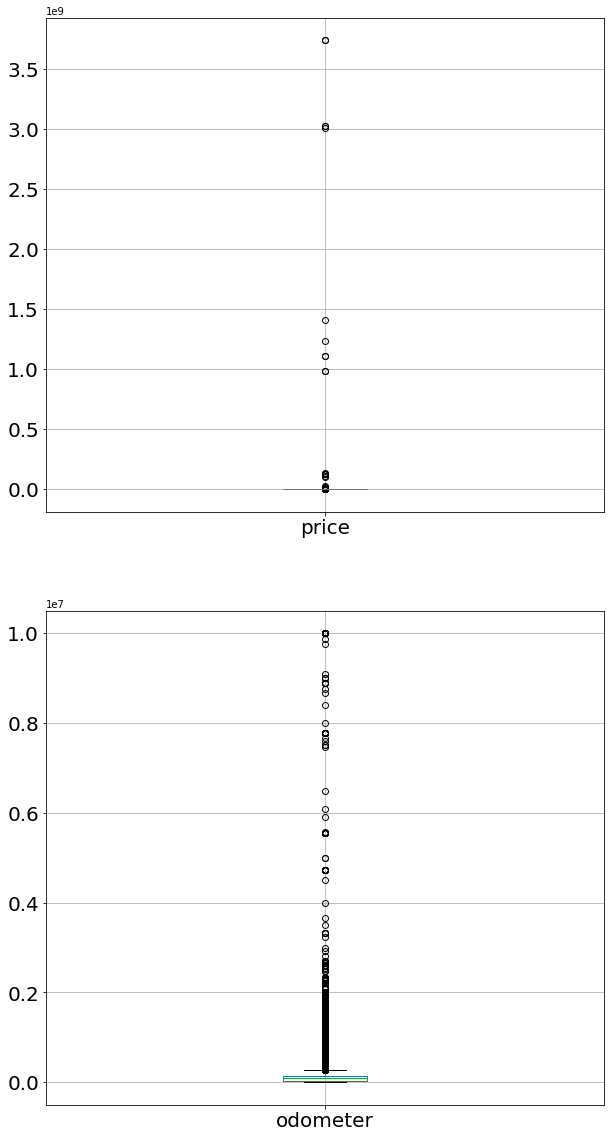

In [18]:
plt.subplots(figsize=(10,20))
plt.subplot(211)
data.boxplot('price', fontsize=20)
plt.subplot(212)
data.boxplot('odometer',fontsize=20 )

Removing rows with extreme values

- Dropped rows with price below \\$ 1000, for ease of interpretation.
- Removed outliers from price and odometer columns using the IQR method. 

The boxplot shows almost normally distributed price and odometer values.  

In [19]:
# Filtering Price values between 1000 (the new minumeum) and 3,736,929,000 (the already given maximum)

data = data[data['price'].between(1000, 3736929000)]

# Computing IQR for price
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filtering price Values between Q1-1.5*IQR and Q3+1.5*IQR

data = data.query('(@Q1_price - 1.5 * @IQR_price) <= price <= (@Q3_price + 1.5 * @IQR_price)')

In [20]:
# Computing IQR for odometer

Q1_odo = data['odometer'].quantile(0.25)
Q3_odo = data['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo

# computer odometer upper limit
odometer_upper_limit = Q3_odo + (1.5 * IQR_odo)
odometer_upper_limit

282960.5

In [21]:
# Filtering price Values between 0 and Q3+1.5*IQR (odometer_upper_limit)

data = data[data['odometer'].between(0, 282960.5)]

The boxplot below shows almost a normal distribtuion for  distributed price and odometer values.

<AxesSubplot:>

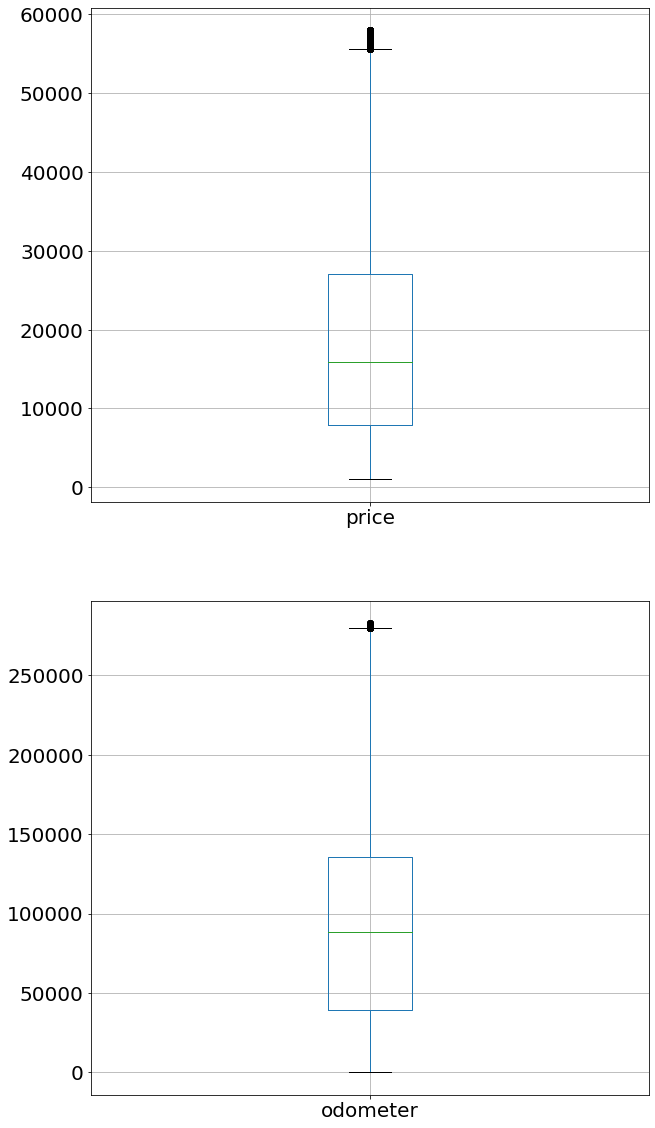

In [22]:
plt.subplots(figsize=(10,20))
plt.subplot(211)
data.boxplot('price', fontsize=20)
plt.subplot(212)
data.boxplot('odometer',fontsize=20 )

In [23]:
# Dropping "other" from cylinders, fuel and type columns and keeping NAN values to be imputed
data = data[data["cylinders"].str.contains("other", na=False) == False]
data = data[data["fuel"].str.contains("other", na=False) == False]
data = data[data["type"].str.contains("other", na=False) == False]

In [24]:
#getting one more look at the percentage of missing values from the total after removing outliers
((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

condition       38.580788
cylinders       37.017932
paint_color     29.267632
drive           28.057273
type            23.438221
manufacturer     3.703977
title_status     1.762173
fuel             0.684691
transmission     0.339270
year             0.279598
price            0.000000
odometer         0.000000
state            0.000000
dtype: float64

----------

Since all missing values for columns are below 40% (borderline for cylinders), I decided to use simple imputer from sklearn to impute categorical variables using the most frequent observation for manufacturer, condition, cylinders, fuel, transmission, drive, type, paint color and title status. 



In [25]:
#imputing categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data[['manufacturer','condition','cylinders','fuel','transmission','drive','type','paint_color','title_status']])
data[['manufacturer','condition','cylinders','fuel','transmission','drive','type','paint_color','title_status']] = \
imputer.transform(data[['manufacturer','condition','cylinders','fuel','transmission','drive','type','paint_color','title_status']])

Imputing missing values for year (using the mode) and odometer (using the mean).

In [26]:
print (data['year'].mode())
print (data['odometer'].mean())

0    2017.0
dtype: float64
97227.34426809388


In [27]:
#imputing numerical variables
data['year'].fillna(2017, inplace=True)
data['odometer'].fillna(97227, inplace=True)

#converting year feature to integer to remove the decimal point
data = data.astype({"year":"int"})

In [28]:
# last look at missing values to check every column is complete

((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

------------------------


- I decided to group the states into 4 groups (northeast, Midwest, west, and south) according to the Census Bureau-designated regions and divisions (6). 

6. United States Census Bureau, Geography Division. "Census Regions and Divisions of the United States"(PDF).Retrieved January10,2013.

- Replace "excellent" condition with "like new"

- Replace "other" transmission to "dual"

- Rename the title_status column to vehicle _status 

- Rename the state column to region




In [29]:
data["state"] = data["state"].replace(['ct','mi','ma','nh','ri','vt','nj','ny','pa','me'],
                                      ['northeast','northeast','northeast','northeast','northeast','northeast','northeast','northeast','northeast','northeast'])

data["state"] = data["state"].replace(['il','in','oh','mi','wi','mn','ia','mo','nd','sd','ne','ks'],
                                      ['midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest','midwest'])

data["state"] = data["state"].replace(['de','md','dc','va','wv','nc','sc','ga','fl','al','ms','tn','ky','ok','ar','tx','la'],
                                      ['south','south','south','south','south','south','south','south','south','south','south','south','south','south','south','south','south'])

data["state"] = data["state"].replace(['mt','wy','co','nm','az','ut','id','nv','wa','ak','or','ca','hi'],
                                      ['west','west','west','west','west','west','west','west','west','west','west','west','west'])

In [30]:
# I did not do this step because the coefficient was not informative
#data["cylinders"] = data["cylinders"].replace(['6 cylinders','4 cylinders','8 cylinders','5 cylinders','10 cylinders','3 cylinders','12 cylinders'],[6,4,8,5,10,3,12])

In [31]:
data["condition"] = data["condition"].replace(['excellent'],['like new'])

In [32]:
data["transmission"] = data["transmission"].replace(['other'],['dual'])

In [33]:
data.rename(columns = {'title_status':'vehicle_status'}, inplace = True)

In [34]:
data.rename(columns = {'state':'region'}, inplace = True)

--------------

## Data visualization

The bar chart shows that the highest sold used vehicle was the Tesla (average: \\$ 37,459) and lowest was the Saturn (average: \\$ 5,297). 

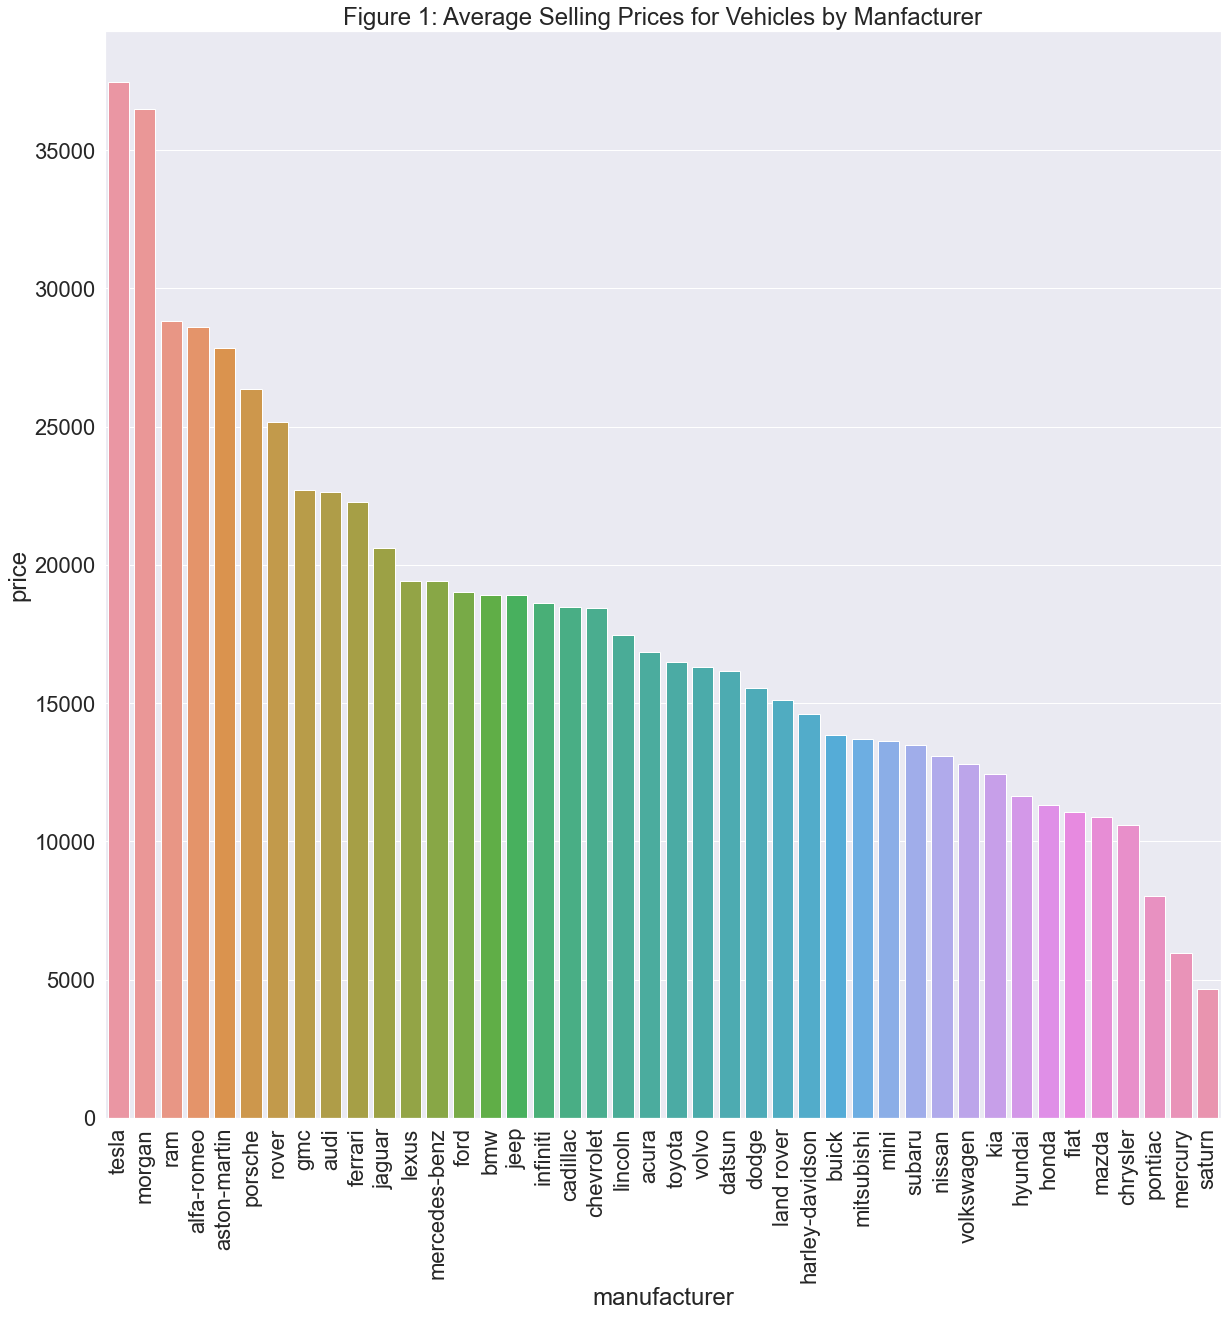

In [35]:
sns.set(font_scale = 2)
Manfacturer = data.groupby('manufacturer', as_index=False)['price'].mean()
Manfacturer = Manfacturer.sort_values(by="price",ascending=False)

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("Figure 1: Average Selling Prices for Vehicles by Manfacturer")
p = sns.barplot(x= 'manufacturer', y='price', data=Manfacturer, ci=False)

In [36]:
Manfacturer

,manufacturer,price
38,tesla,37445.711538
30,morgan,36500.000000
34,ram,28817.943231
1,alfa-romeo,28597.677282
2,aston-martin,27834.818182
33,porsche,26360.751254
35,rover,25176.829703
14,gmc,22688.651953
3,audi,22643.666728
11,ferrari,22275.500000


The bar chart below shows average prices for sold vehicles by year of make. Older vehicles were sold at higher prices. The reason for that is because these vehicles are sold as antiques and vintage cars. However, the expected trend of sale prices can be captured after the 90s. In which, the car selling prices gradually increases until 2002 model, after which a steeper increase is noticed until 2021 models.

([<matplotlib.axis.XTick at 0x7fb6981db5b0>,
 [Text(0, 0, '1900'),
  Text(1, 0, '1905'),
  Text(2, 0, '1915'),
  Text(3, 0, '1916'),
  Text(4, 0, '1918'),
  Text(5, 0, '1920')])

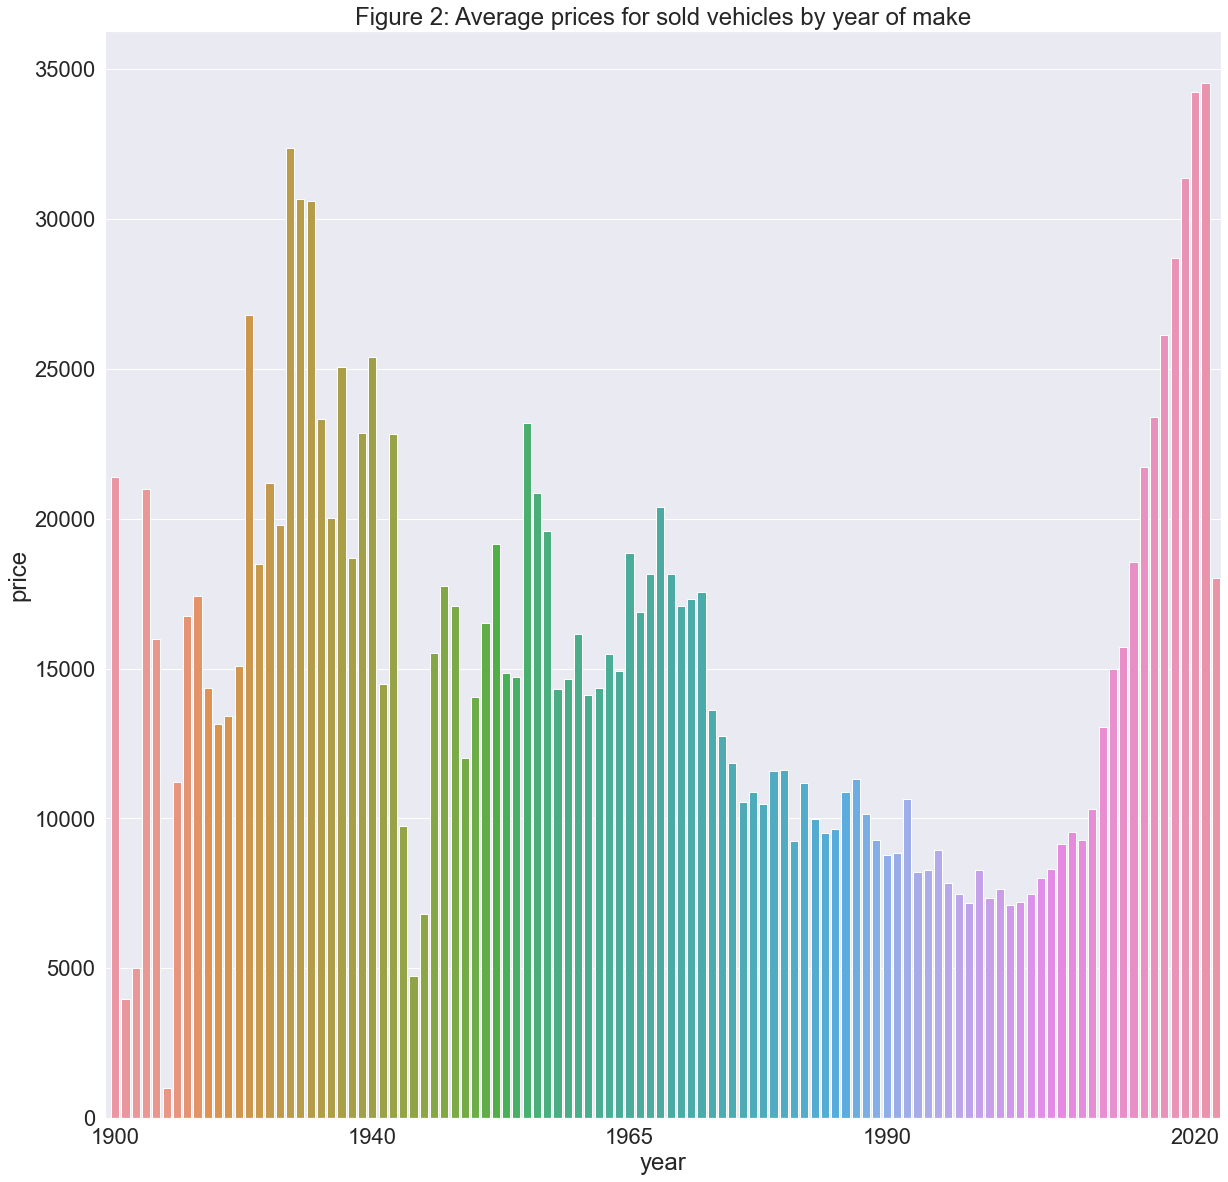

In [37]:
year = data.groupby('year', as_index=False)['price'].mean()
plt.figure(figsize=(20,20))
plt.title("Figure 2: Average prices for sold vehicles by year of make")
p = sns.barplot(x= 'year', y='price', data=year, ci=False)
plt.xticks([-1, 0, 25, 50, 75, 105])

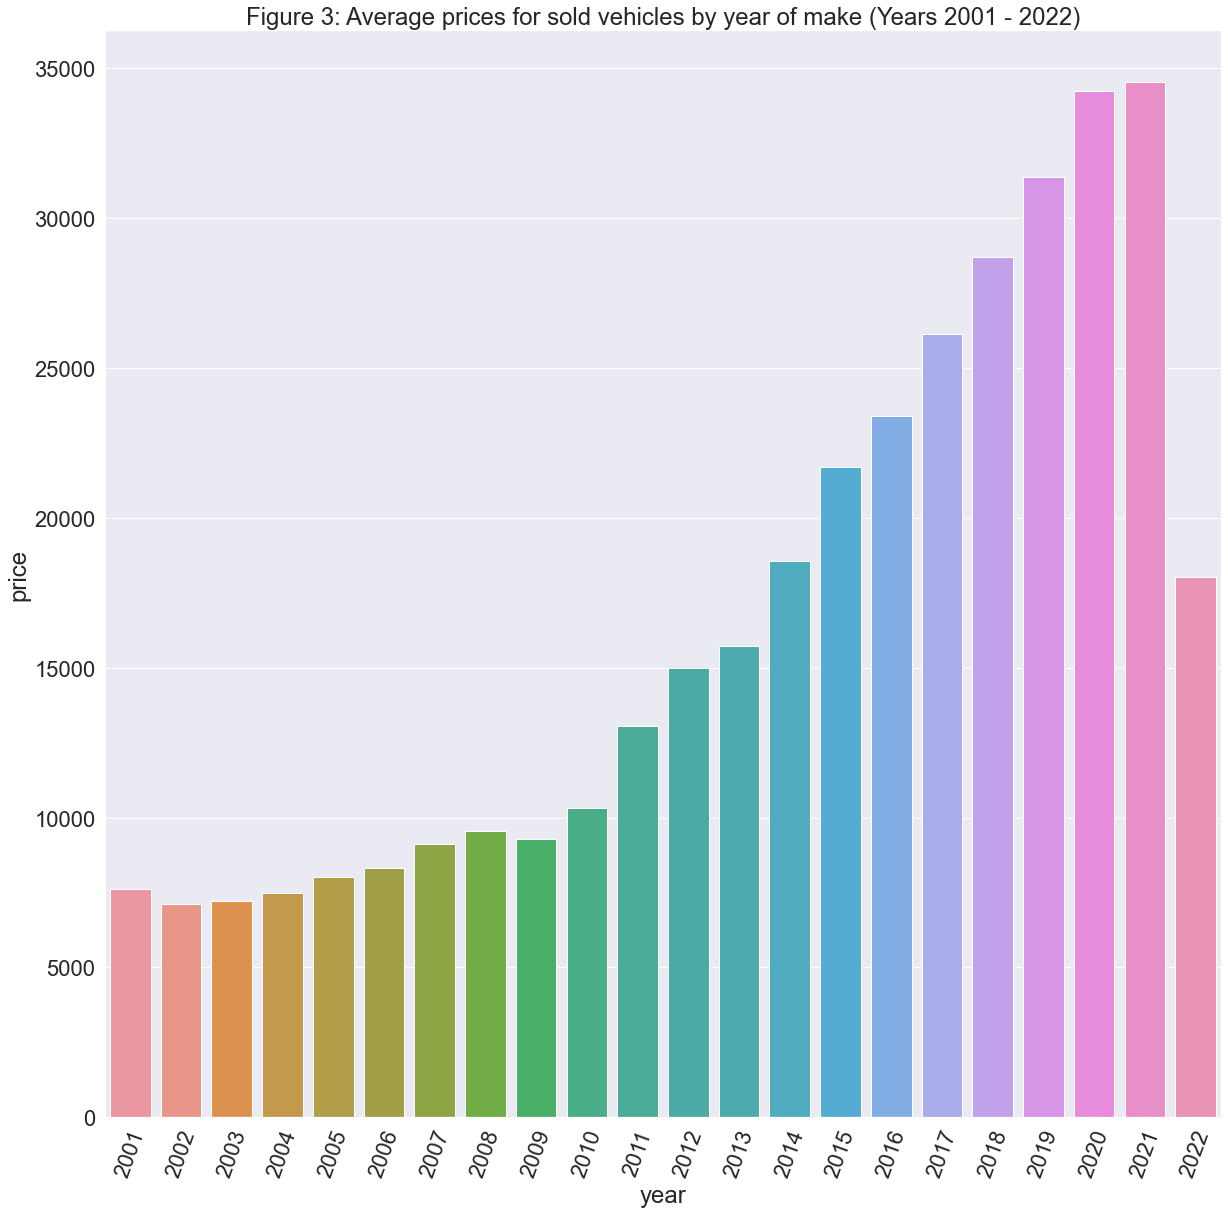

In [38]:
year_20 = data.groupby('year', as_index=False)['price'].mean()
year_20 = year.loc[(year.year >= 2001)]
plt.figure(figsize=(20,20))
plt.title("Figure 3: Average prices for sold vehicles by year of make (Years 2001 - 2022)")
plt.xticks(rotation=70)
p = sns.barplot(x= 'year', y='price', data=year_20, ci=False)

The bar chart below shows minimal difference in average selling prices for used vehicles across the country four regions. The highest average selling prices (by not much) were for the west and south regions, while the lowest was the northeast region.

[Text(0, 0, '18989.1'),
 Text(0, 0, '18100.9'),
 Text(0, 0, '16574.7'),
 Text(0, 0, '14975.5')]

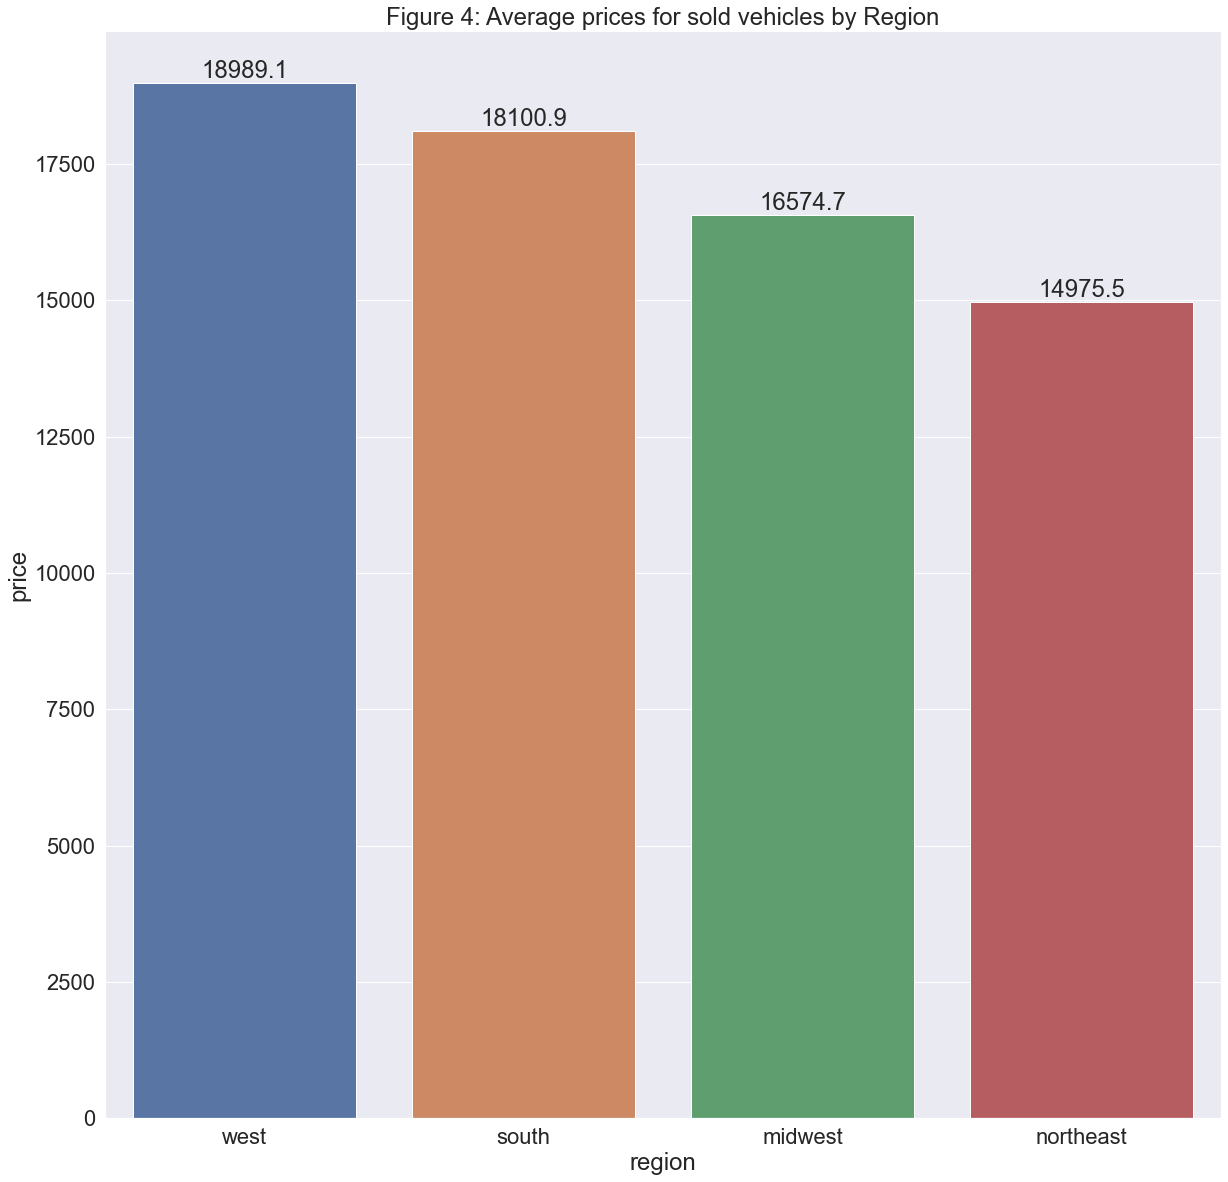

In [39]:
region = data.groupby('region', as_index=False)['price'].mean()
region = region.sort_values(by="price",ascending=False)
plt.figure(figsize=(20,20))
plt.title("Figure 4: Average prices for sold vehicles by Region")

p = sns.barplot(x= 'region', y='price', data=region, ci=False)
p.bar_label(p.containers[0])


Also, for the paint color, the highest average selling price was for black vehicles.

[Text(0, 0, '19374.2'),
 Text(0, 0, '18271.8'),
 Text(0, 0, '17414.3'),
 Text(0, 0, '17383.9'),
 Text(0, 0, '16345.4'),
 Text(0, 0, '15852'),
 Text(0, 0, '15586.6'),
 Text(0, 0, '15523.3'),
 Text(0, 0, '15204.1'),
 Text(0, 0, '15058.6'),
 Text(0, 0, '14037.4'),
 Text(0, 0, '12602.8')]

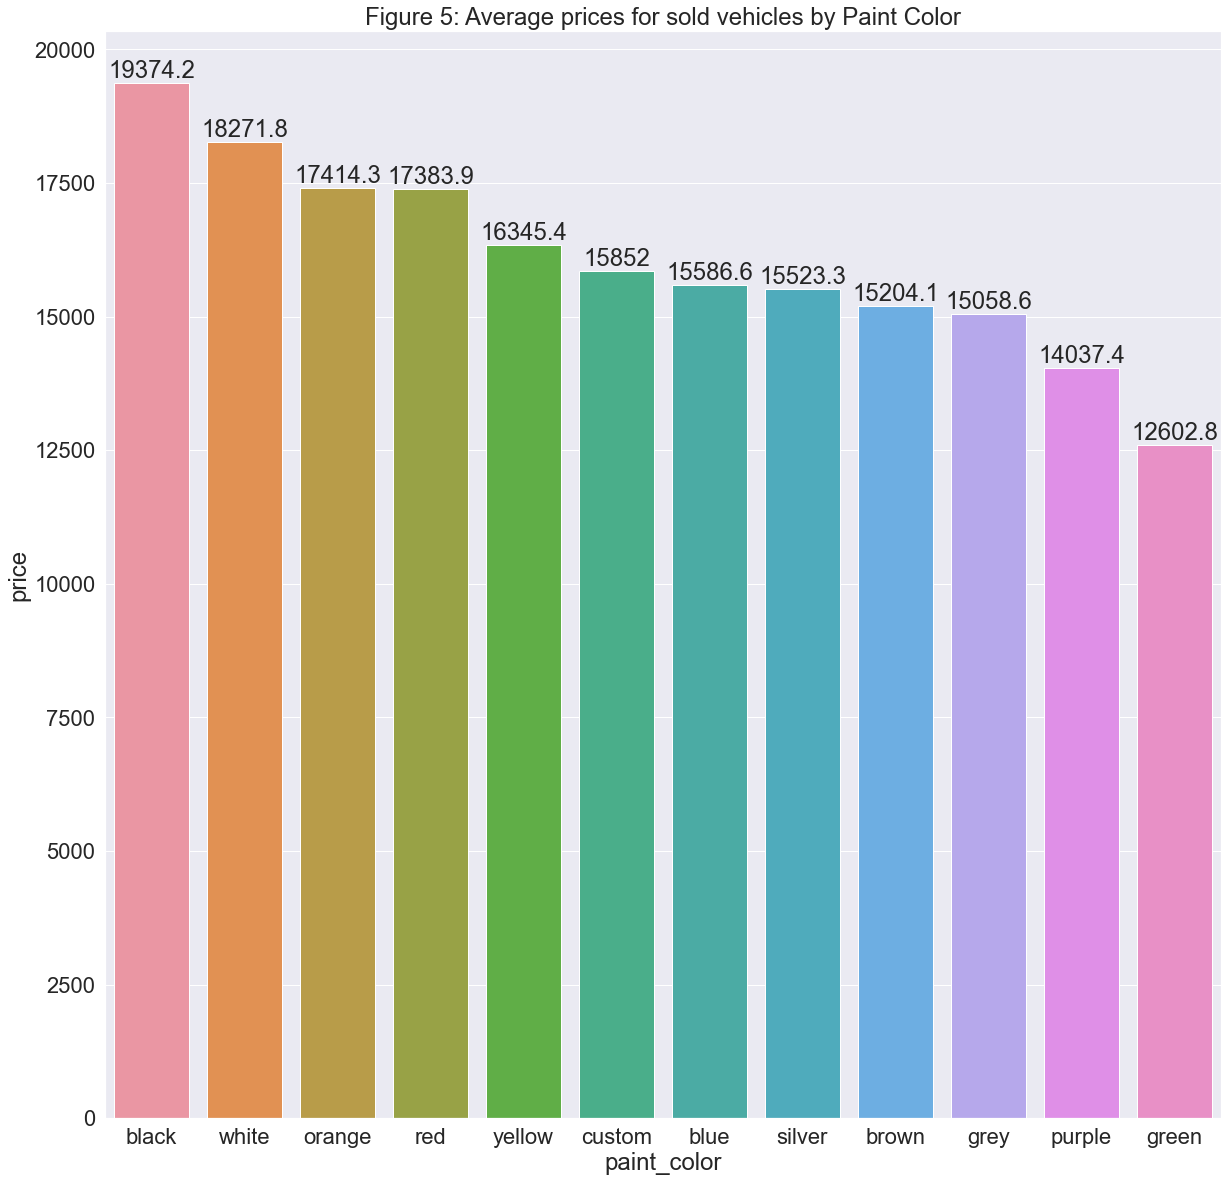

In [40]:
paint_color = data.groupby('paint_color', as_index=False)['price'].mean()
paint_color = paint_color.sort_values(by="price",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Figure 5: Average prices for sold vehicles by Paint Color")
p = sns.barplot(x= 'paint_color', y='price', data=paint_color, ci=False)
p.bar_label(p.containers[0])


The bar chart shows average prices of selling used vehicles by their status. It shows vehicles who are on lien had the highest average selling price followed by clean vehicles. 

[Text(0, 0, '20085'),
 Text(0, 0, '17636'),
 Text(0, 0, '12855'),
 Text(0, 0, '10101.2'),
 Text(0, 0, '6322.75'),
 Text(0, 0, '4584.54')]

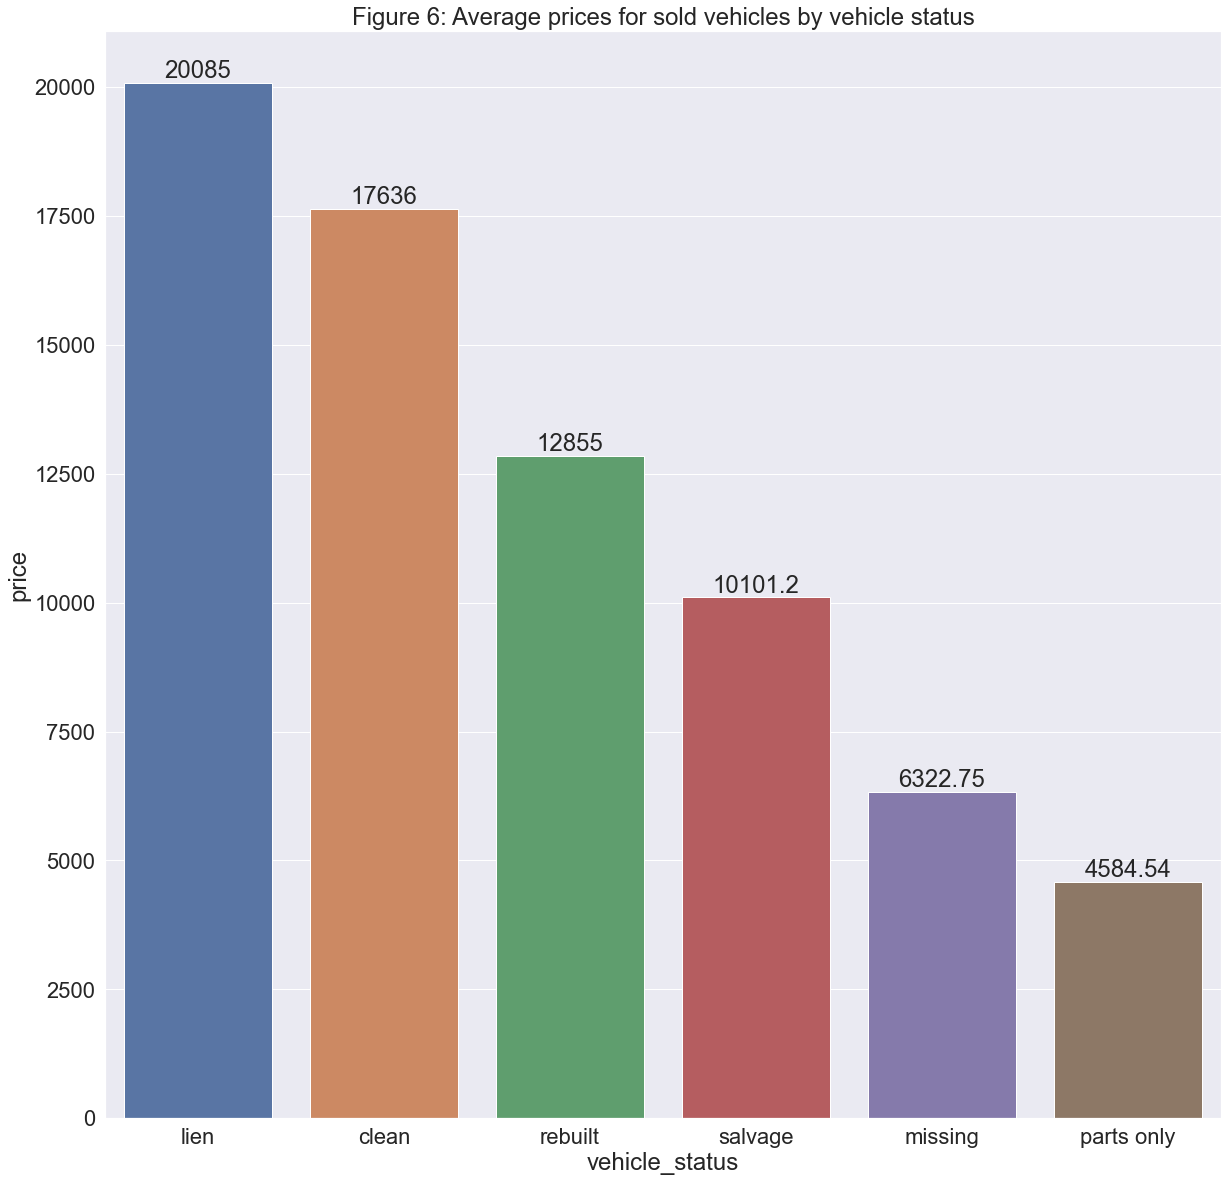

In [41]:
vehicle_status = data.groupby('vehicle_status', as_index=False)['price'].mean()
vehicle_status = vehicle_status.sort_values(by="price",ascending=False)
plt.figure(figsize=(20,20))
plt.title("Figure 6: Average prices for sold vehicles by vehicle status")
p = sns.barplot(x= 'vehicle_status', y='price', data=vehicle_status, ci=False)
p.bar_label(p.containers[0])


The bar chart shows average prices of selling used vehicles by their type. It shows pickup, trucks and coupe had the highest average selling price. 

[Text(0, 0, '26756.4'),
 Text(0, 0, '25425.2'),
 Text(0, 0, '20615.1'),
 Text(0, 0, '17959.2'),
 Text(0, 0, '17731.6'),
 Text(0, 0, '17149.7'),
 Text(0, 0, '16087.2'),
 Text(0, 0, '15529'),
 Text(0, 0, '14430.5'),
 Text(0, 0, '14158.6'),
 Text(0, 0, '14005.5'),
 Text(0, 0, '9882.2')]

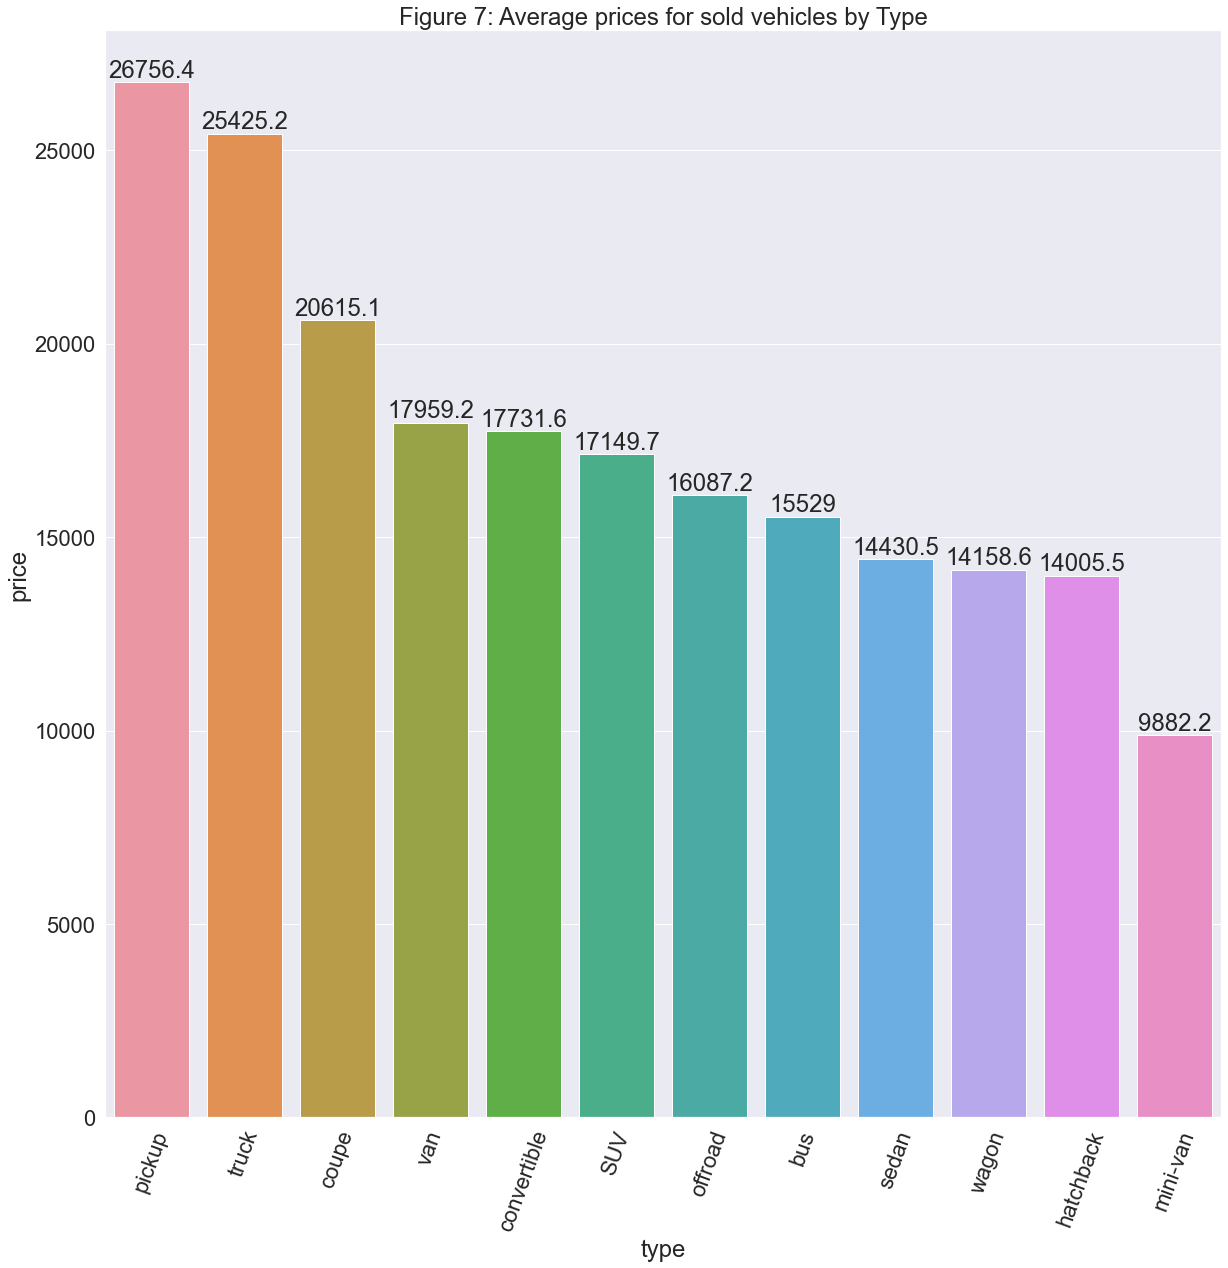

In [42]:
type_v = data.groupby('type', as_index=False)['price'].mean()
type_v = type_v.sort_values(by="price",ascending=False)
plt.figure(figsize=(20,20))
plt.title("Figure 7: Average prices for sold vehicles by Type")
plt.xticks(rotation=70)

p = sns.barplot(x= 'type', y='price', data=type_v, ci=False)
p.bar_label(p.containers[0])

The bar chart shows average prices of selling used vehicles by their fuel. It shows diesel and electric had the highest average selling price. 

[Text(0, 0, '29790.2'),
 Text(0, 0, '25514.5'),
 Text(0, 0, '16619.3'),
 Text(0, 0, '15199.2')]

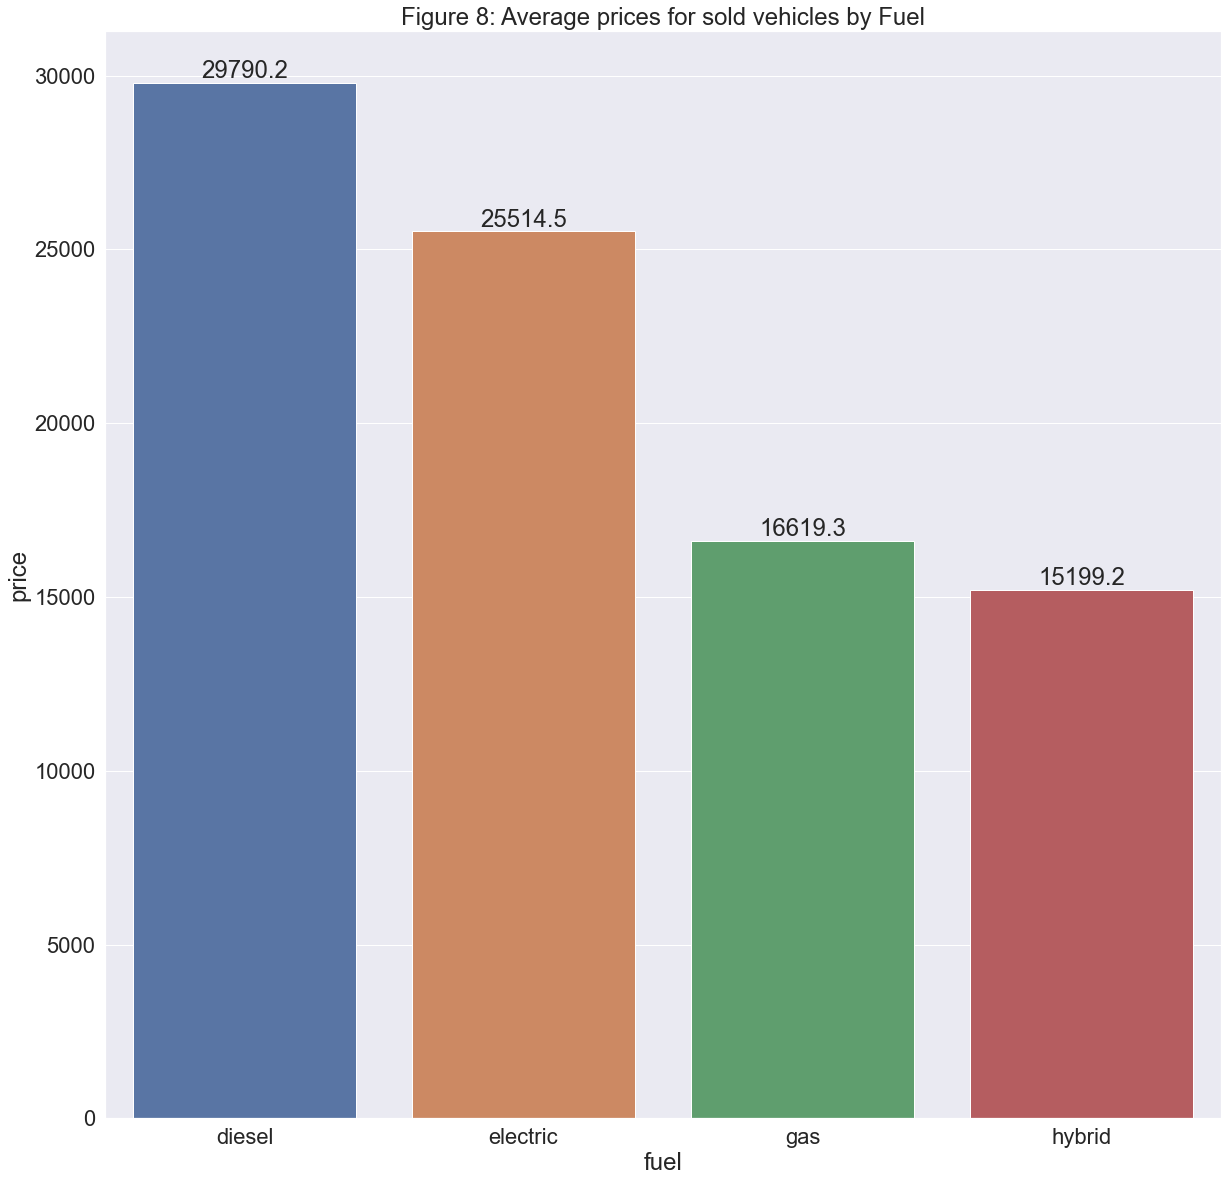

In [43]:
fuel = data.groupby('fuel', as_index=False)['price'].mean()
fuel = fuel.sort_values(by="price",ascending=False)
plt.figure(figsize=(20,20))
plt.title("Figure 8: Average prices for sold vehicles by Fuel")
p = sns.barplot(x= 'fuel', y='price', data=fuel, ci=False)
p.bar_label(p.containers[0])


The bar chart shows average prices of selling used vehicles by their cylinders. It shows vehicles with 12, 8 or 10 cylinders had the highest average selling price.

[Text(0, 0, '22677.3'),
 Text(0, 0, '21981.2'),
 Text(0, 0, '21181.1'),
 Text(0, 0, '18205.9'),
 Text(0, 0, '13090.1'),
 Text(0, 0, '11565.2'),
 Text(0, 0, '7836.82')]

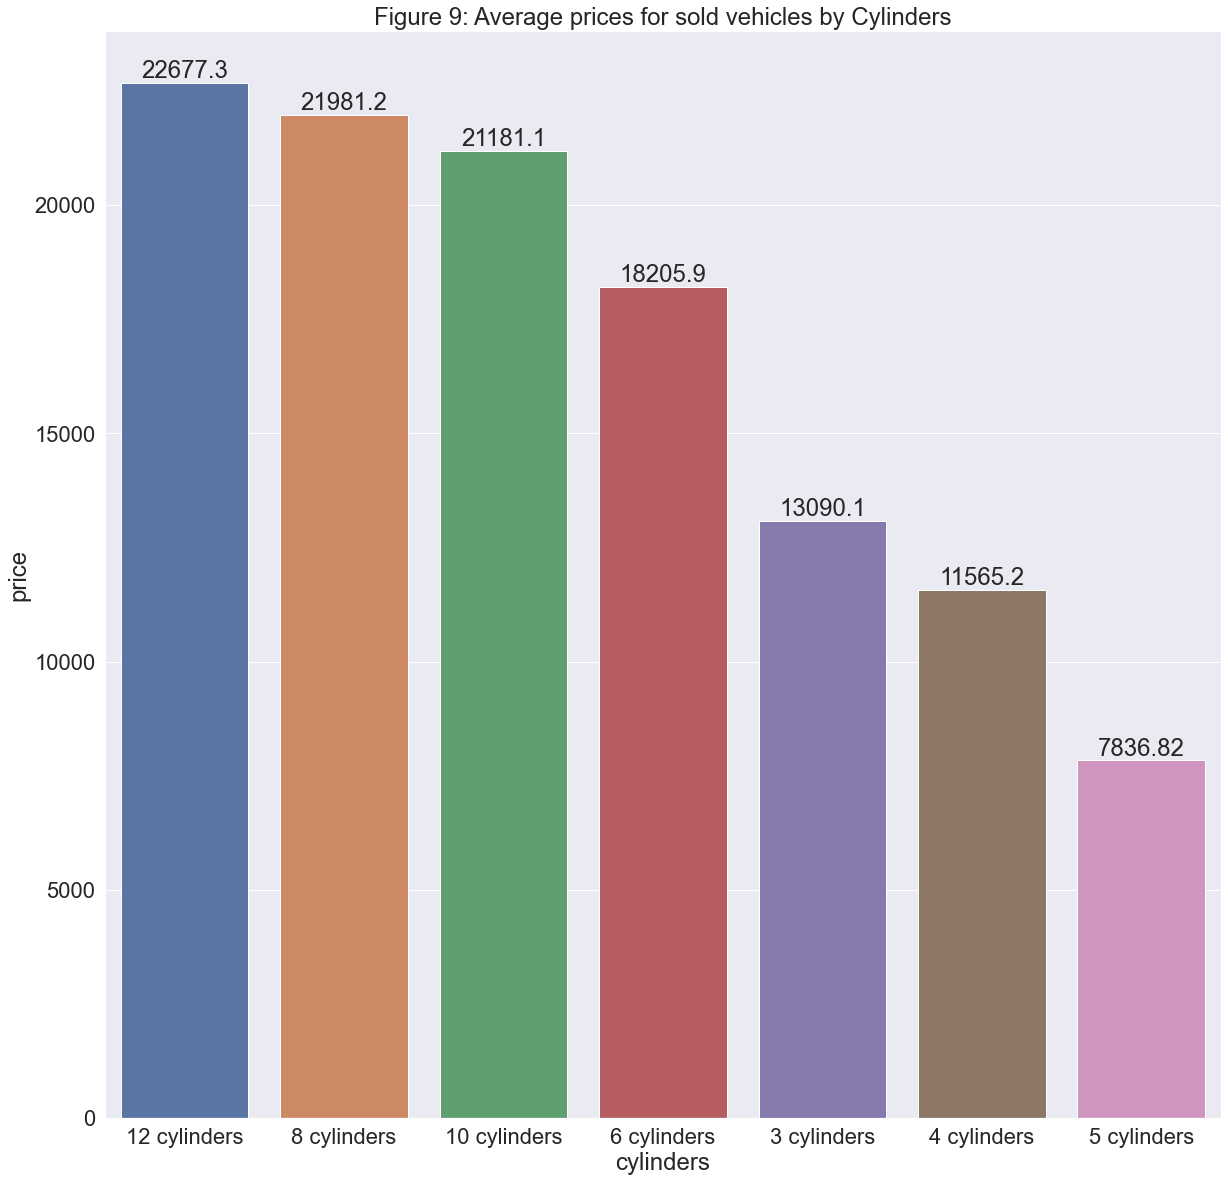

In [44]:
cylinders = data.groupby('cylinders', as_index=False)['price'].mean()
cylinders = cylinders.sort_values(by="price",ascending=False)
plt.figure(figsize=(20,20))
plt.title("Figure 9: Average prices for sold vehicles by Cylinders")
p = sns.barplot(x= 'cylinders', y='price', data=cylinders, ci=False)
p.bar_label(p.containers[0])


-----

Using TargetEncoder() from category_encoders, I computed values for each categorical value in relation to the price column. 

In [45]:
encoder = TargetEncoder()
data['manufacturer_te'] = encoder.fit_transform(data['manufacturer'], data['price'])

In [46]:
encoder = TargetEncoder()
data['fuel_te'] = encoder.fit_transform(data['fuel'], data['price'])

In [47]:
encoder = TargetEncoder()
data['type_te'] = encoder.fit_transform(data['type'], data['price'])

In [48]:
encoder = TargetEncoder()
data['paint_color_te'] = encoder.fit_transform(data['paint_color'], data['price'])

In [49]:
encoder = TargetEncoder()
data['transmission_te'] = encoder.fit_transform(data['transmission'], data['price'])

In [50]:
encoder = TargetEncoder()
data['drive_te'] = encoder.fit_transform(data['drive'], data['price'])

In [51]:
encoder = TargetEncoder()
data['region_te'] = encoder.fit_transform(data['region'], data['price'])

In [52]:
encoder = TargetEncoder()
data['condition_te'] = encoder.fit_transform(data['condition'], data['price'])

In [53]:
encoder = TargetEncoder()
data['vehicle_status_te'] = encoder.fit_transform(data['vehicle_status'], data['price'])

In [54]:
encoder = TargetEncoder()
data['cylinders_te'] = encoder.fit_transform(data['cylinders'], data['price'])

In [55]:
#Dropping unwanted categorical columns
data_te = data.select_dtypes(exclude='object')

-------

The final cleaned dataset contain 13 columns and 366243 rows (vehicle entries) with all numeric features and no missing values or outliers. 

In [56]:
data_te.shape

(325110, 13)

In [57]:
data_te.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325110 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              325110 non-null  int64  
 1   year               325110 non-null  int64  
 2   odometer           325110 non-null  float64
 3   manufacturer_te    325110 non-null  float64
 4   fuel_te            325110 non-null  float64
 5   type_te            325110 non-null  float64
 6   paint_color_te     325110 non-null  float64
 7   transmission_te    325110 non-null  float64
 8   drive_te           325110 non-null  float64
 9   region_te          325110 non-null  float64
 10  condition_te       325110 non-null  float64
 11  vehicle_status_te  325110 non-null  float64
 12  cylinders_te       325110 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 42.8 MB


-------

From the correlations between the study features and price, I can see the strongest negative correlation was between price and odometer (correlation coefficient = -0.54), and the strongest positive correlation was between price and year (correlation coefficient = 0.37). There are no high correlations between features that should affect the quality of the model. There is a noticeable negative correlation between odometer and transmission, but it is not high enough to cause collinearity issues in the model (correlation coefficient = -0.35). 

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

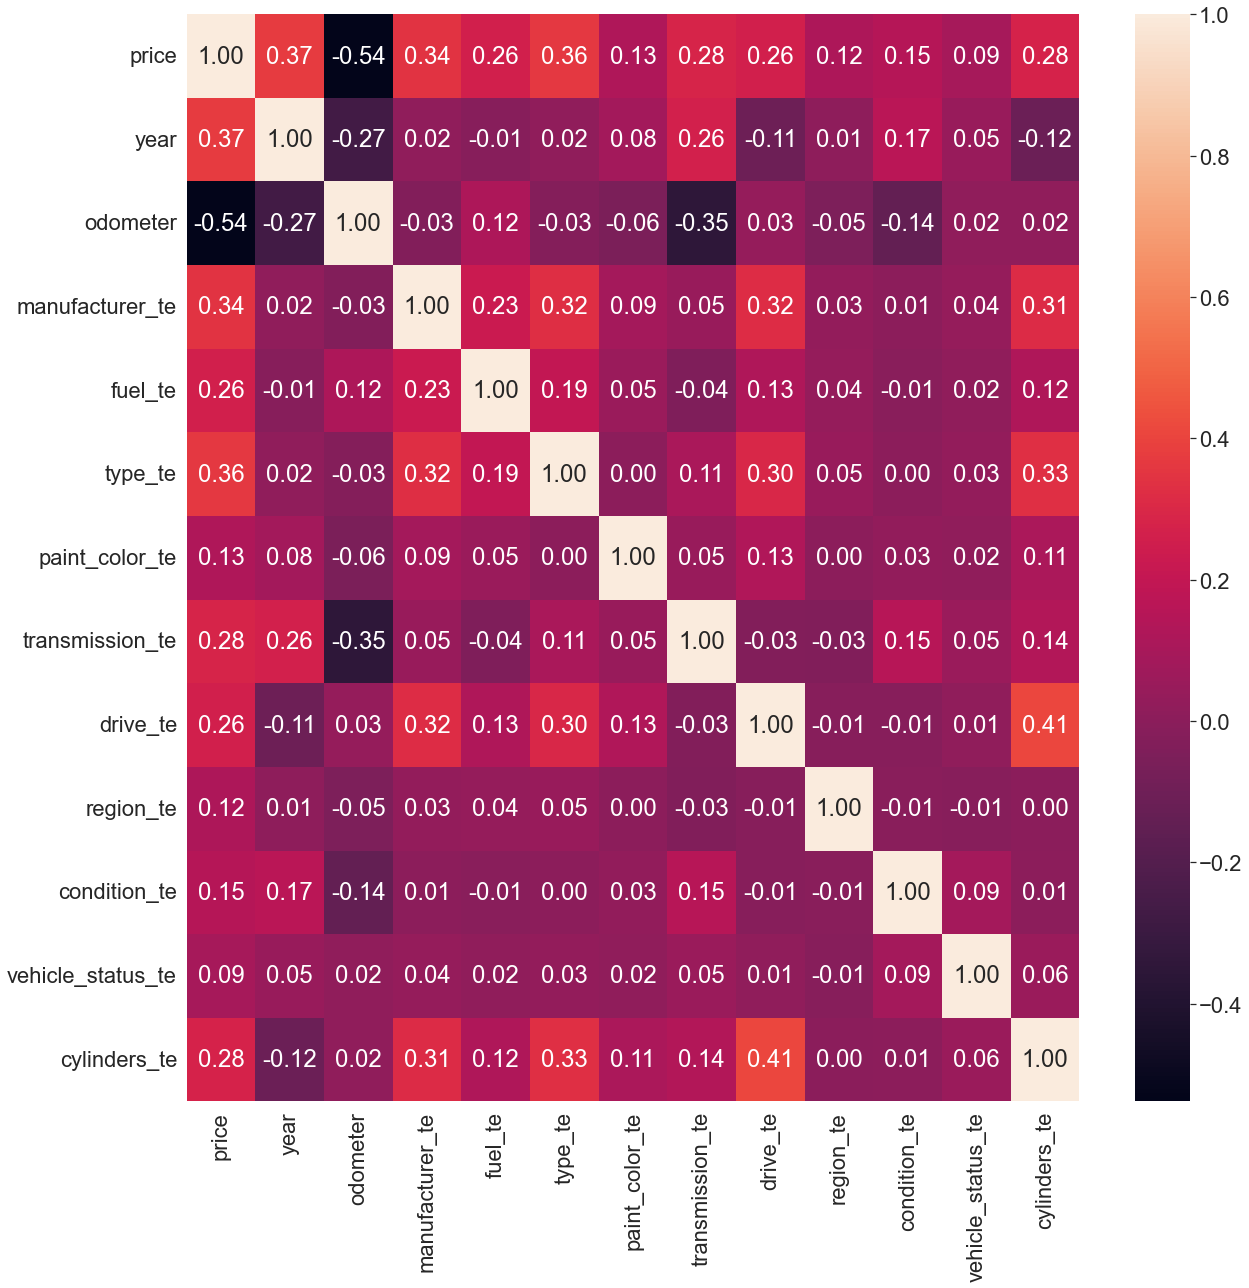

In [58]:
plt.tight_layout()
plt.figure(figsize=(20,20))
sns.heatmap(data_te.corr(), annot=True, fmt='.2f')

------------

For the final step of data preparation, I would scale the data to have a standard deviation of one.

In [59]:
object= StandardScaler()
data_te_scaled = pd.DataFrame(object.fit_transform(data_te), columns=data_te.columns)
data_te_scaled.describe()

,price,year,odometer,manufacturer_te,fuel_te,type_te,paint_color_te,transmission_te,drive_te,region_te,condition_te,vehicle_status_te,cylinders_te
count,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05,3.251100e+05
mean,-4.186481e-16,6.608659e-15,2.760948e-15,2.266570e-14,-5.652521e-14,3.669050e-15,-3.948338e-15,-2.064268e-14,-4.852895e-14,4.920297e-14,4.964736e-15,3.272762e-14,-4.620726e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.326385e+00,-1.153106e+01,-1.602384e+00,-3.019309e+00,-6.992622e-01,-1.691154e+00,-3.074424e+00,-1.100337e+00,-1.668844e+00,-1.652030e+00,-7.098793e+00,-1.118759e+01,-2.807805e+00
25%,-8.262726e-01,-3.660959e-01,-8.516011e-01,-8.486670e-01,-2.567826e-01,-6.738799e-01,-1.179365e+00,-2.857081e-01,-1.668844e+00,-5.815142e-01,-7.251913e-03,1.674975e-01,2.228452e-01
50%,-2.535638e-01,2.599768e-01,-3.981503e-02,2.371489e-01,-2.567826e-01,-6.738799e-01,5.260741e-01,-2.857081e-01,5.965044e-01,4.400730e-01,-7.251913e-03,1.674975e-01,2.228452e-01
75%,6.498641e-01,5.730132e-01,7.049272e-01,3.672247e-01,-2.567826e-01,1.153533e-01,5.260741e-01,-2.857081e-01,5.965044e-01,1.034564e+00,4.716257e-01,1.674975e-01,2.228452e-01
max,3.270612e+00,1.199086e+00,3.059472e+00,4.725491e+00,3.846930e+00,2.082929e+00,1.226207e+00,2.800352e+00,6.104189e-01,1.034564e+00,3.200556e+00,2.298167e+00,1.529717e+00


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Modeling

I began by splitting the data into 70% and 30% for train and test set respectively. In assessment of the model quality, I will focus on the R-squared values (i.e., model score) and mean squared error (mse) values, with more concentration on the test set model values.

In [60]:
# creating two dataframes one for the features and the other for the target variable
X = data_te_scaled.drop(['price'], axis = 1)
y = data_te_scaled[['price']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Linear Regression Model

First, I created a Linear Regression Model with all features. This yielded train model score of 61% and a test model score of 61%, and a mean squared error of 0.390 (train set) and 0.389 (test set).

In [62]:
# define the model
model = LinearRegression()

# fit model
model.fit(X_train, y_train)

# computing model scores
LR_train_mse = mean_squared_error(y_train, model.predict(X_train))
LR_test_mse = mean_squared_error(y_test, model.predict(X_test))
LR_train_score = model.score(X_train, y_train)
LR_test_score = model.score(X_test, y_test)

print('LR Mean Squared error train:', LR_train_mse)
print('LR Mean Squared error test:', LR_test_mse)
print('LR R-sqaured train:', LR_train_score)
print('LR R-sqaured test:', LR_test_score)

LR Mean Squared error train: 0.3901707063384206
LR Mean Squared error test: 0.3888692415060483
LR R-sqaured train: 0.6107934325351791
LR R-sqaured test: 0.6088568668908625


------------

### Ridge Regression Model

I then used a Ridge regression over a set of alpha values using grid search with cross validation set to 5, to compute the best model with the least mean squared error. This yielded train model score of 61% and a test model score of 61%, and a mean squared error of 0.390 (train set) and 0.389 (test set).

In [63]:
parameters = {'alpha':[0.1, 0.001, 0.2 , 1, 5, 10, 20,30]}

# define the model
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X, y)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
Ridge_best_model = Ridge_reg.best_estimator_
Ridge_best_model.fit(X, y)
Ridge_train_mse = mean_squared_error(y_train, Ridge_best_model.predict(X_train))
Ridge_test_mse = mean_squared_error(y_test, Ridge_best_model.predict(X_test))
Ridge_train_score = Ridge_best_model.score(X_train, y_train)
Ridge_test_score = Ridge_best_model.score(X_test, y_test)


print('Ridge Mean Squared error train:', Ridge_train_mse)
print('Ridge Mean Squared error test:', Ridge_test_mse)
print('Ridge R-sqaured train:', Ridge_train_score)
print('Ridge R-sqaured test:', Ridge_test_score)

Ridge(alpha=30)
Ridge Mean Squared error train: 0.39017382851570226
Ridge Mean Squared error test: 0.3888517289121479
Ridge R-sqaured train: 0.6107903180730141
Ridge R-sqaured test: 0.6088744818886971


The bar chart below shows the feature importance using the feature coefficients from the computed best model. The highest feature was odometer followed by year, as expected from the correlation heat map. Other important features are fuel, type, manufacturer, and cylinders. This is also confirmed using the premutation importance.

<AxesSubplot:>

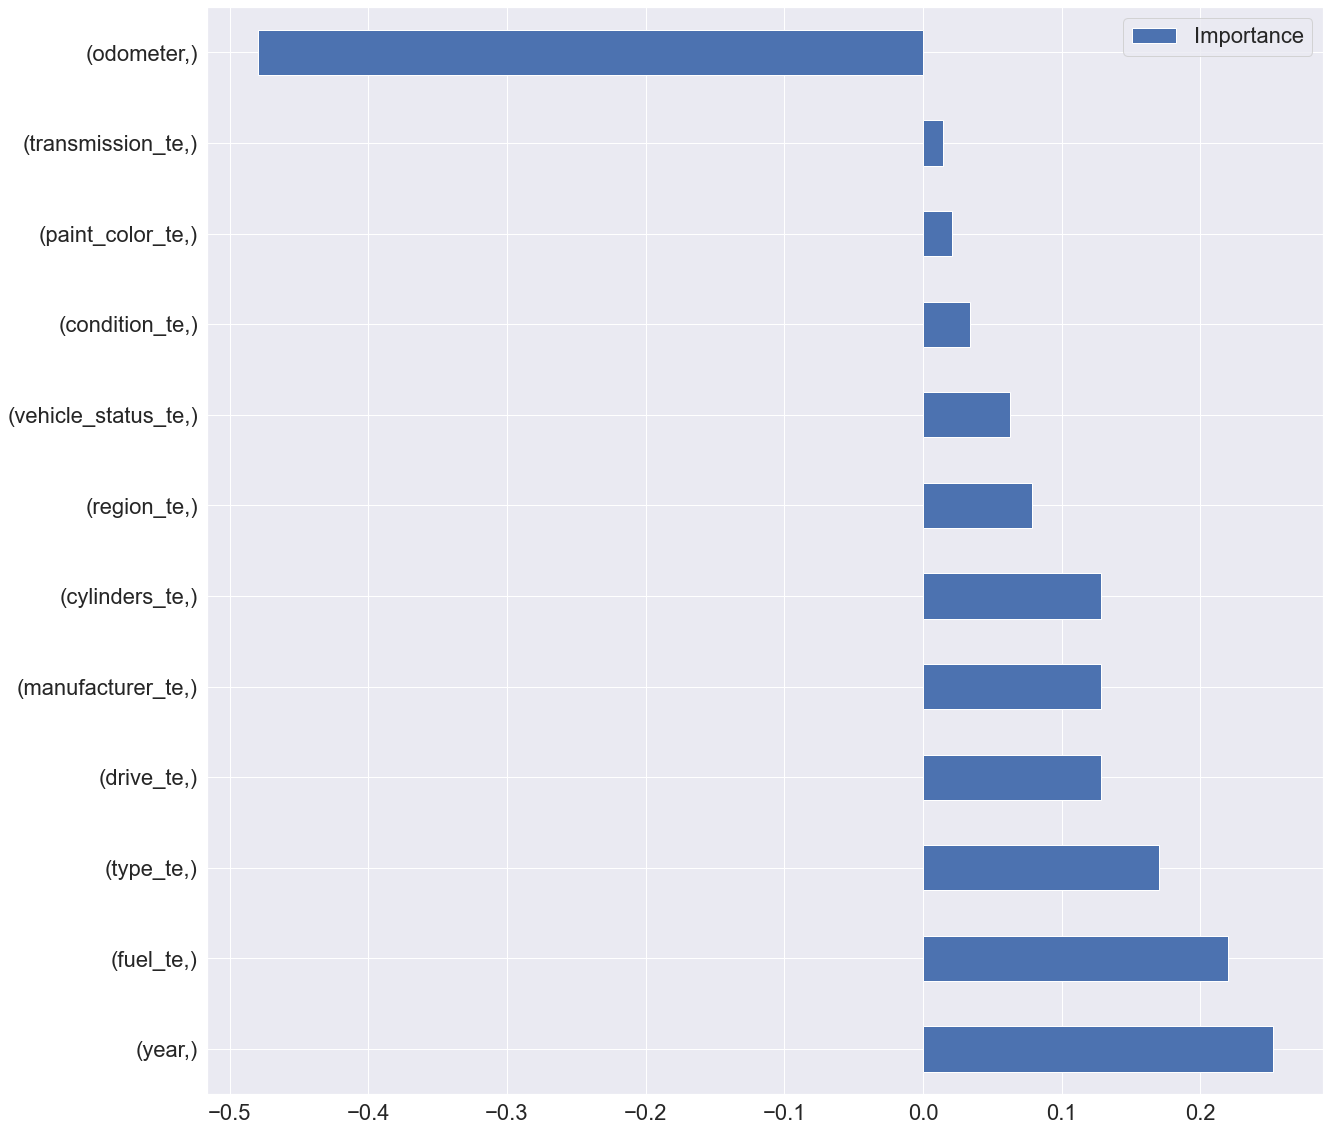

In [64]:
# Getting the coefficients of the best model into a data frame
coef_ridge = pd.DataFrame(Ridge_best_model.coef_)
coef_ridge.columns = [X.columns]

# Transposing the data frame to build a bar chart
coef_ridge = coef_ridge.T
coef_ridge.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the Ridge regression best model
coef_ridge = coef_ridge.sort_values(by="Importance",ascending=False)
coef_ridge.plot.barh(figsize=(20,20))

Using permutation_importance, I can further evaluate the importance of the model features. Which were the same features as stated above.

In [65]:
ridge_pi = permutation_importance(Ridge_best_model, X_test, y_test, n_repeats = 5, random_state = 42)
pd.DataFrame({"Variable":X.columns, "Score":ridge_pi.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
1,odometer,0.459934
0,year,0.129815
3,fuel_te,0.096632
4,type_te,0.058517
11,cylinders_te,0.033281
7,drive_te,0.033252
2,manufacturer_te,0.033093
8,region_te,0.011876
10,vehicle_status_te,0.007831
9,condition_te,0.002453


--------------

### Lasso Regression Model

Lasso regression had almost the same R-squared regression as ridge regression, with train model score of 61% and a test model score of 61%, and a mean squared error of 0.390 (train set) and 0.389 (test set).

In [66]:
parameters = {'alpha':[0.1, 0.001, 0.2 , 1, 5, 10, 20,30]}

# define the model
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Lasso_reg.fit(X, y)

# best estimator
print(Lasso_reg.best_estimator_)

# best model
Lasso_best_model = Lasso_reg.best_estimator_
Lasso_best_model.fit(X, y)

Lasso_train_mse = mean_squared_error(y_train, Lasso_best_model.predict(X_train))
Lasso_test_mse = mean_squared_error(y_test, Lasso_best_model.predict(X_test))
Lasso_train_score = Lasso_best_model.score(X_train, y_train)
Lasso_test_score = Lasso_best_model.score(X_test, y_test)


print('Lasso Mean Squared error train:', Lasso_train_mse)
print('Lasso Mean Squared error test:', Lasso_test_mse)
print('Lasso R-sqaured train:',Lasso_train_score)
print('Lasso R-sqaured test:', Lasso_test_score)

Lasso(alpha=0.001)
Lasso Mean Squared error train: 0.39018462275234556
Lasso Mean Squared error test: 0.38885011548155635
Lasso R-sqaured train: 0.610779550509678
Lasso R-sqaured test: 0.6088761047537357


The bar chart below shows the feature importance using the feature coefficients from the computed best model. Which had the same features as the ridge regression model

<AxesSubplot:>

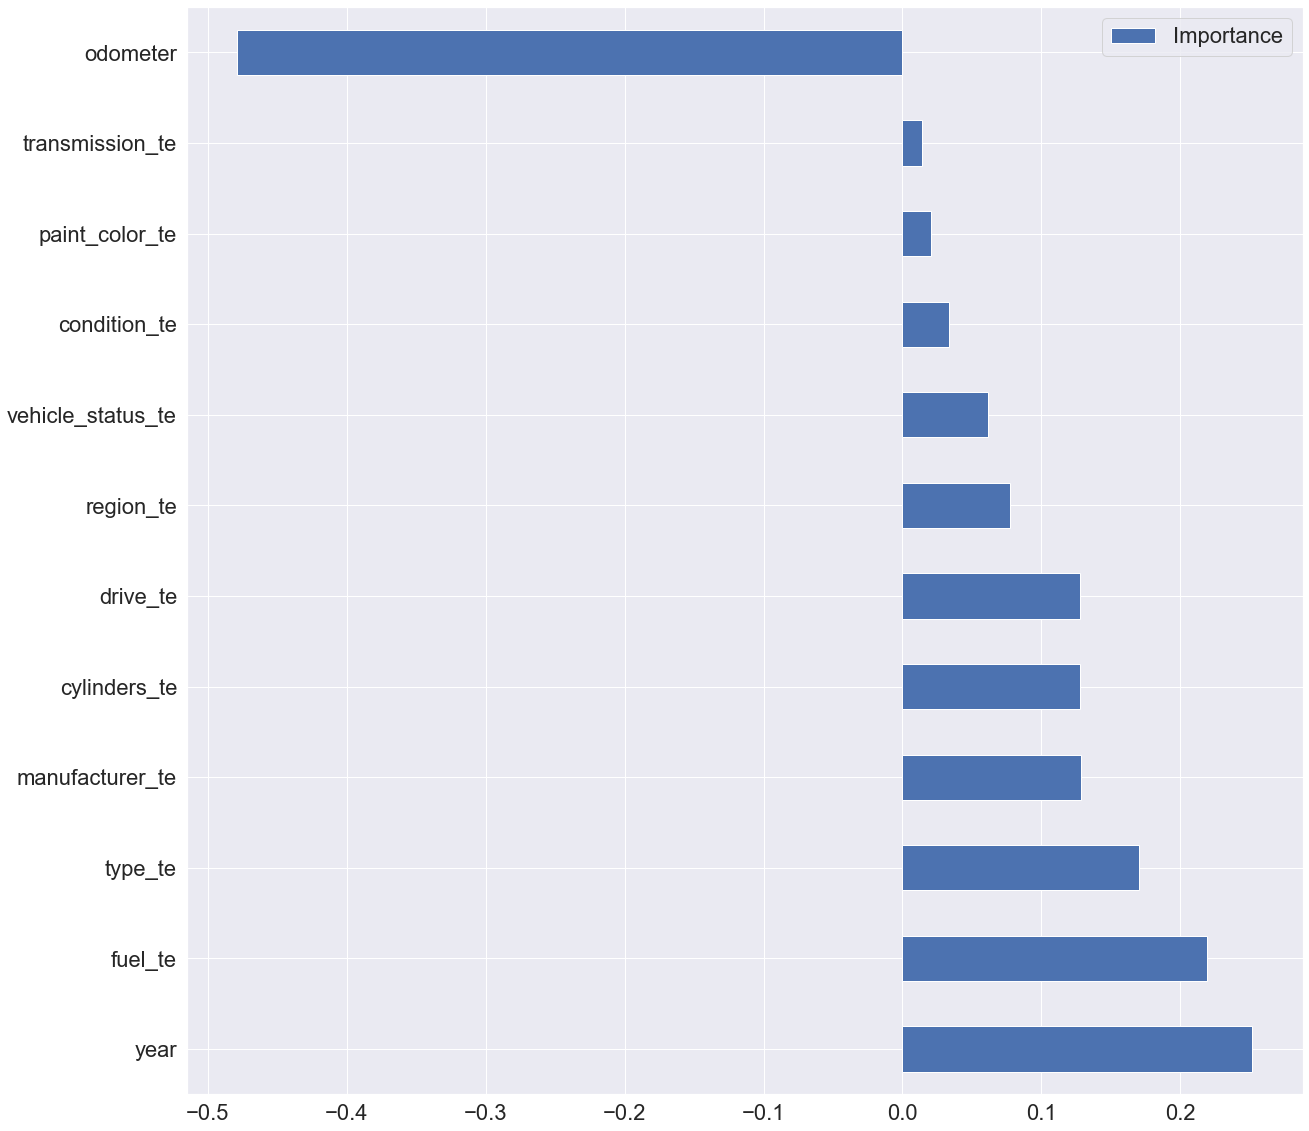

In [67]:
# Getting the coefficients of the best model into a data frame
coef_Lasso = pd.DataFrame([Lasso_best_model.coef_], columns = X.columns)


# Transposing the data frame to build a bar chart
coef_Lasso = coef_Lasso.T
coef_Lasso.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the Lasso regression best model
coef_Lasso = coef_Lasso.sort_values(by="Importance",ascending=False)
coef_Lasso.plot.barh(figsize=(20,20))

In [68]:
# Using permutation_importance, I had the same features as stated above.
lasso_pi = permutation_importance(Lasso_best_model, X_test, y_test, n_repeats = 5, random_state = 42)
pd.DataFrame({"Variable":X.columns, "Score":lasso_pi.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
1,odometer,0.459757
0,year,0.129706
3,fuel_te,0.096396
4,type_te,0.058640
11,cylinders_te,0.033352
2,manufacturer_te,0.033232
7,drive_te,0.033197
8,region_te,0.011740
10,vehicle_status_te,0.007747
9,condition_te,0.002426


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Evaluation

For model evaluation, I would choose the Ridge regression Model as it yielded slightly better estimates than both Linear Regression and Lasso Regression. However, I believe there are some room for improvement. Recalling Figure 2, I am assuming that older vehicles (70s models and older) have special characteristics (i.e., vintage cars) that might lead to fluctuations in their prices. So, I decided to perform a sensitivity analysis to test this assumption.

Also, at this stage I decided to go back and keep the cylinders column as categorical and use TargetEncoder().

### Sensitivity analysis

I decided to perform a sensitivity analysis to see if my model is sensitive to year of make. 
I used only data for car models from year 2001 to year 2021. The resulting model scores were 70% for both train and test set and a lower MSE than the full dataset model. 

This finding supports my earlier observation of varying vehicles price by year of make. Also, it proves that the data is sensitive to the year of make. As older vehicles were sold as ventage cars which led to raising their market prices than recent used cars. The features contributing to vehicle did not change from the full dataset model. However, the feature year had a higher importance than odometer in this sensitivity analysis model.

In [69]:
# Selecting data for the sensitivity analysis
data_sens_ana = data_te[data_te['year'].between(2001, 2021)]

In [70]:
# Preforming the same Ridge Regression as earlier but with a subset of the data
object= StandardScaler()
data_sens_ana_scaled = pd.DataFrame(object.fit_transform(data_sens_ana), columns=data_sens_ana.columns)

In [71]:
X_sens = data_sens_ana_scaled.drop(['price'], axis = 1)
y_sens = data_sens_ana_scaled[['price']]

In [72]:
X_train_sens, X_test_sens, y_train_sens, y_test_sens = train_test_split(X_sens,y_sens, test_size = 0.3, random_state = 42)

In [73]:
parameters = {'alpha':[0.1, 0.001, 0.2 , 1, 5, 10, 20,30]}

# define the model
model = Ridge()

# define the grid search
Ridge_reg_sens= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg_sens.fit(X_sens, y_sens)

# best estimator
print(Ridge_reg_sens.best_estimator_)

# best model
Ridge_best_model_sens = Ridge_reg_sens.best_estimator_
Ridge_best_model_sens.fit(X_sens, y_sens)
Ridge_train_mse_sens = mean_squared_error(y_train_sens, Ridge_best_model_sens.predict(X_train_sens))
Ridge_test_mse_sens = mean_squared_error(y_test_sens, Ridge_best_model_sens.predict(X_test_sens))
Ridge_train_score_sens = Ridge_best_model_sens.score(X_train_sens, y_train_sens)
Ridge_train_score_sens = Ridge_best_model_sens.score(X_test_sens, y_test_sens)


print('Sens Ridge Mean Squared error train:', Ridge_train_mse_sens)
print('Sens Ridge Mean Squared error test:', Ridge_test_mse_sens)
print('Sens Ridge R-sqaured train:', Ridge_train_score_sens)
print('Sens Ridge R-sqaured test:', Ridge_train_score_sens)

Ridge(alpha=30)
Sens Ridge Mean Squared error train: 0.29998111953352957
Sens Ridge Mean Squared error test: 0.2990552661822778
Sens Ridge R-sqaured train: 0.7009184168233727
Sens Ridge R-sqaured test: 0.7009184168233727


<AxesSubplot:>

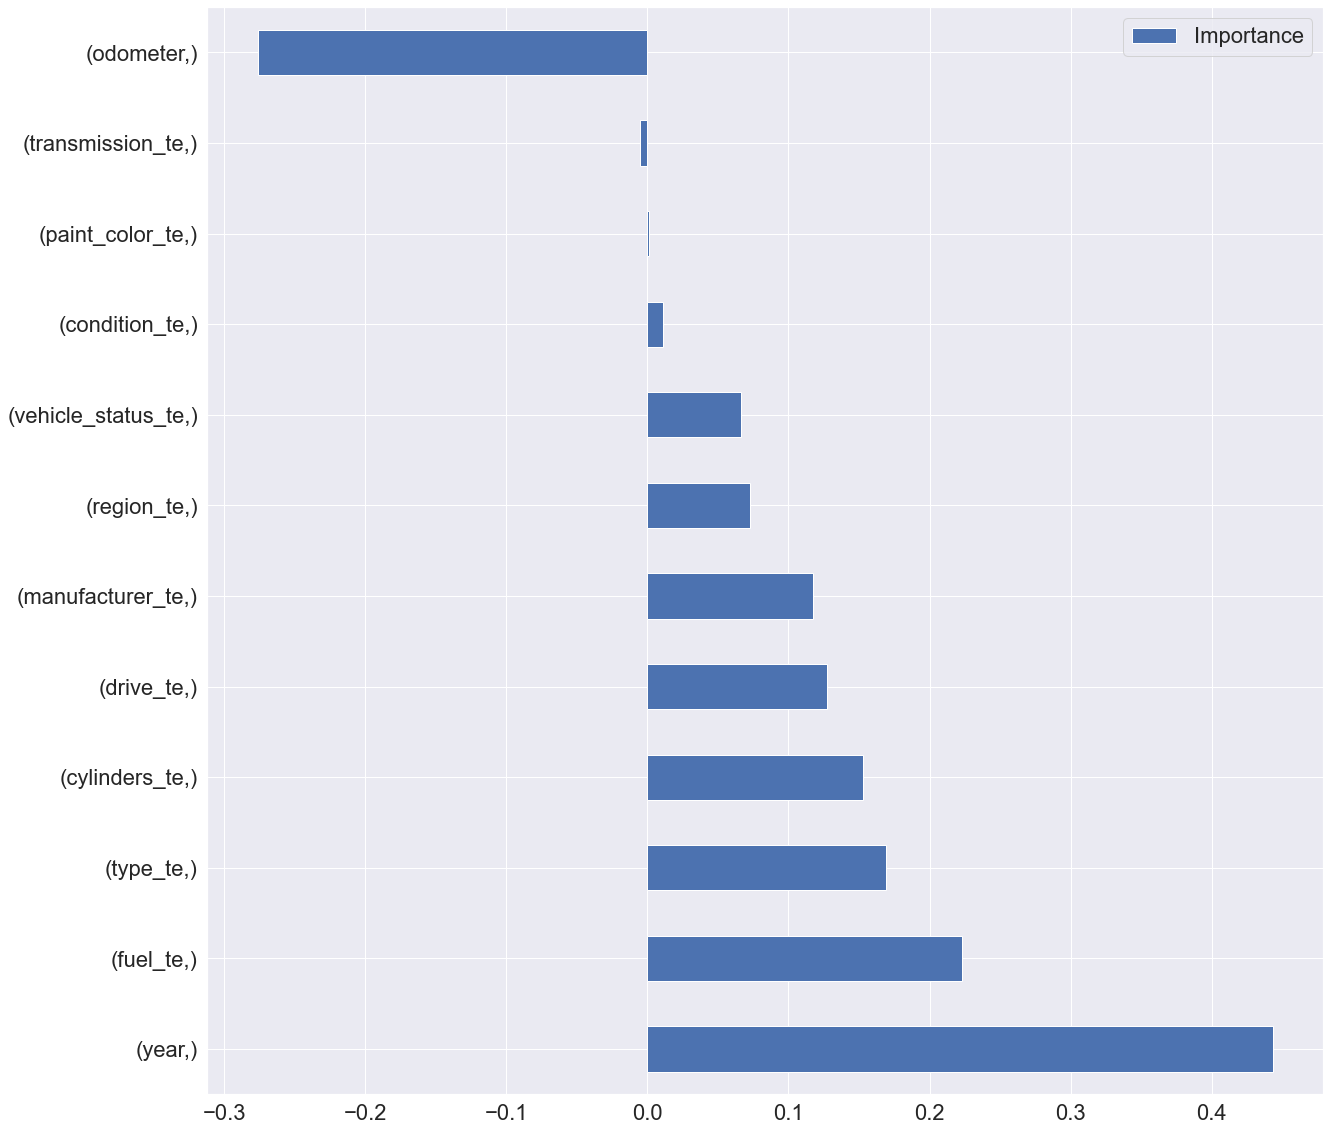

In [74]:
# Getting the coefficients of the best model into a data frame
coef_ridge_sens = pd.DataFrame(Ridge_best_model_sens.coef_)
coef_ridge_sens.columns = [X_sens.columns]

# Transposing the data frame to build a bar chart
coef_ridge_sens = coef_ridge_sens.T
coef_ridge_sens.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the Ridge regression best model
coef_ridge_sens = coef_ridge_sens.sort_values(by="Importance",ascending=False)
coef_ridge_sens.plot.barh(figsize=(20,20))

----------

For the ease of delivering the message to the client, I created the same model using the sensitivity analysis data but without scaling (us for unscaled). To be able to extract meaningful coefficients.

In [75]:
X_us = data_sens_ana.drop(['price'], axis = 1)
y_us = data_sens_ana[['price']]

In [76]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us,y_us, test_size = 0.3, random_state = 42)

In [77]:
parameters = {'alpha':[0.1, 0.001, 0.2 , 1, 5, 10, 20,30]}

# define the model
model = Ridge()

# define the grid search
Ridge_reg_us= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg_us.fit(X, y)

# best estimator
print(Ridge_reg_us.best_estimator_)

# best model
Ridge_best_model_us = Ridge_reg_us.best_estimator_
Ridge_best_model_us.fit(X_us,y_us)
Ridge_train_mse_us = mean_squared_error(y_train_us, Ridge_best_model_us.predict(X_train_us))
Ridge_test_mse_us = mean_squared_error(y_test_us, Ridge_best_model_us.predict(X_test_us))
Ridge_train_score_us = Ridge_best_model_us.score(X_train_us, y_train_us)
Ridge_test_score_us = Ridge_best_model_us.score(X_test_us, y_test_us)


print('Unscaled Ridge Mean Squared error train:', Ridge_train_mse_us)
print('Unscaled Ridge Mean Squared error test:', Ridge_test_mse_us)
print('Unscaled Ridge R-sqaured train:', Ridge_train_score_us)
print('Unscaled Ridge R-sqaured test:', Ridge_test_score_us)

Ridge(alpha=30)
Unscaled Ridge Mean Squared error train: 46244333.89245547
Unscaled Ridge Mean Squared error test: 46101658.452174716
Unscaled Ridge R-sqaured train: 0.700029842555959
Unscaled Ridge R-sqaured test: 0.7009181847088836


Extracting the coefficients and the intercept of the unscaled sensitivity analysis model.

In [78]:
#Extracting the coefficients
coef_ridge_us = pd.DataFrame(Ridge_best_model_us.coef_)
coef_ridge_us.columns = [X_us.columns]
coef_ridge_us

,year,odometer,manufacturer_te,fuel_te,type_te,paint_color_te,transmission_te,drive_te,region_te,condition_te,vehicle_status_te,cylinders_te
0,1122.384681,-0.05746,0.340986,0.871972,0.469233,0.010416,-0.018163,0.485713,0.603165,0.089073,0.760265,0.558645


In [79]:
##Extracting the intercept
Ridge_best_model_us.intercept_

array([-2307925.83387778])

-------

Finally, I evaluated a sensitivity analysis model with only important features (st for short). However, the resulting R-squared test value was lower than the full model. So I decided to opt for the full feature sensitivity analysis model. 

In [80]:
X_st = data_sens_ana[['year','odometer','fuel_te','type_te','cylinders_te']]
y_st = data_sens_ana[['price']]

In [81]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st,y_st, test_size = 0.3, random_state = 42)

In [82]:
parameters = {'alpha':[0.1, 0.001, 0.2 , 1, 5, 10, 20,30]}

# define the model
model = Ridge()

# define the grid search
Ridge_reg_st= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg_st.fit(X, y)

# best estimator
print(Ridge_reg_st.best_estimator_)

# best model
Ridge_best_model_st = Ridge_reg_st.best_estimator_
Ridge_best_model_st.fit(X_st,y_st)
Ridge_train_mse_st = mean_squared_error(y_train_st, Ridge_best_model_st.predict(X_train_st))
Ridge_test_mse_st = mean_squared_error(y_test_st, Ridge_best_model_st.predict(X_test_st))
Ridge_train_score_st = Ridge_best_model_st.score(X_train_st, y_train_st)
Ridge_test_score_st = Ridge_best_model_st.score(X_test_st, y_test_st)


print('Short Ridge Mean Squared error train:', Ridge_train_mse_st)
print('Short Ridge Mean Squared error test:', Ridge_test_mse_st)
print('Short Ridge R-sqaured train:', Ridge_train_score_st)
print('Short Ridge R-sqaured test:', Ridge_test_score_st)

Ridge(alpha=30)
Short Ridge Mean Squared error train: 52062562.51149667
Short Ridge Mean Squared error test: 51938049.22866772
Short Ridge R-sqaured train: 0.6622891117897203
Short Ridge R-sqaured test: 0.6630549405916968


------

Considering the above evaluation, I believe the findings are clear, and the full sensitivity analysis model can be applied to the current settings with some caution. This stage is now complete as I have identified the best model for the data and captured the important features that influence used vehicle prices.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Deployment

### Report

#### Findings

Used vehicle price prediction is a challenging task due to the high number of features that should be considered for accurate prediction. I used three different regression methods on the full dataset which are Linear, Lasso and Ridge regressions. From the model scores I decided to go with the Ridge Regression Model. 

It has been proven clear that Odometer and Year of Make were the strongest predicators of vehicle prices. 

In which as the odometer reading increase the vehicle price decrease significantly. On the other hand, as the year of make increase the vehicle price increase significantly. 

Other important features for used vehicle price:

- Fuel: Vehicles which run on diesel have the highest influence on price, these are followed by electric cars.
- Type: Pickup and trucks had the highest influence on price, these are followed by coupe cars.
- Cylinders: Vehicles with high cylinders (12,10, or 8) had a higher price.


The sensitivity analysis resulted into an improved model score. Although it utilizes less sample size, but I highly recommend using this model over the full data set model. First, it contains vehicles which are commonly found in the market (i.e., vehicles which are not older than 20 years). Also, this sensitivity analysis dataset, excludes used vehicles sold as vintage cars which clearly affected the trend of used vehicles prices. Finally, the results from sensitivity analysis model can be applied to the market directly as it had a higher score.

From the sensitivity analysis model, I can say that for each one year increase in the vehicle age there is an increase in the price by \\$ 1122. 

In other words, if we have two Toyota cars, one made in year 2010 and the other in year 2011 and this was the only difference between them. The 2011 Toyota will be \\$ 1122 more expensive than the 2010 one.

Also, for every 5000 miles driven (multiplying the odometer coefficient by 5000) there is a decrease in price by \\$ 285 

#### Limitations and recommendations

- Caution is required using the sensitivity analysis model, as the R-Squared value of 0.70 would indicate that only 70% of the variance of the price is explained by the variance of its presented features. It is considered a high score but still not high enough.

- Target encoding is dependent on the distribution of the target (i.e., data-specific) which could result into biased estimates.

- Analyzing the dataset by vehicle type is recommended, as there are different kinds of vehicles (e.g., trucks, vans, pickups, trucks, etc.). This will give more accurate estimates for each vehicle group.

- I removed the outliers from the data which caused missing valuable information. Another sensitivity analysis is recommended to see the effect of removing the outliers.

- I only used three regression methods, there happen to be far more methods to be used. This is beyond the scope of this project, but it would be worth exploring different regression methods and comparing them.

- I would also recommend splitting the dataset by year of make, and analyze each group separately to avoid the bias discussed previously.

### Example: 

If we are looking at a car with following specs

- Year: 2018
- Odometer: 20,000	
- Manufacturer: Toyota
- Fuel: Gas
- Type: Sedan	
- Paint color: Black	
- Transmission: Automatic
- Drive: fwd
- Region:	West
- Condition: Good
- Vehicle status:	Clean
- Cylinders: 4

I will use the eqaution from sensitivity analysis model (i.e., vehicle model from year 2001, 2021)

In [83]:
Car_price =  (Ridge_best_model_us.intercept_ + (coef_ridge_us.iloc[0][0] * 2019) + (coef_ridge_us.iloc[0][1] * 20000) + \
(coef_ridge_us.iloc[0][2] * 16496.264419) + (coef_ridge_us.iloc[0][3] * 16619.347155) + (coef_ridge_us.iloc[0][4] * 14430.515488) + \
(coef_ridge_us.iloc[0][5] * 19374.161942) + (coef_ridge_us.iloc[0][6] * 16438.128924) + (coef_ridge_us.iloc[0][7] * 12096.696642) + \
(coef_ridge_us.iloc[0][8] * 18989.058127) + (coef_ridge_us.iloc[0][9] * 18327.431933) + (coef_ridge_us.iloc[0][10] * 17636.008706) +\
(coef_ridge_us.iloc[0][11] * 11565.216619)).round(0)

Final_Price = str(Car_price)[1:-1]

print('The expected selling price for this car will be $',Final_Price)

The expected selling price for this car will be $ 22641.


I will be providing a simple version of this price calculator (i.e., price predictor). Probably through an excel sheet. Just a reminder that this calculator will only work on used vehicles from year 2001 till 2021. For used vehicles before these specified dates, we will need to develop another model with a different calculator.

### Closing statement

In vehicle models from year 2001 to 2021, customers value a vehicle primarily by its year of make (the recent the better) and odometer (the smaller millage the better). Other factors, especially for cars, are fuel (electric), type (coupe), and cylinders (12, 8, then 10). Factors such as transmission, paint color and condition are not as important.

## Thank you and hope this was helpful !
## AZ